# Lab 2: Data Preprocessing

In this assignment, we will learn how to explore the raw data and preprocess it. 

The dataset we are going to exlore is an insurance data. It provides different features of each user as follows:
* age: age of the user
* sex: gender of the user
* bmi: body mass index, providing an understanding of body
* children: number of children covered by health insurance / number of dependents
* smoker: smoker or not
* region: the user's residential area in the US, northeast, southeast, southwest, northwest.

Additionally, the medical cost of each user is also provided: 
* charges: the medical cost 

Please follow Lecture 5_data_understanding and Lecture 6_data_preprocessing to complete following questions. 

### Q1. Load data with Pandas and output the basic information of this dataset, such as the features and their data types.  Which features are numerical features and which users are categorical features?


In [1]:
# libraries
import pandas as pd                             # for read_csv
import matplotlib.pyplot as plt                 # for plt.hist, plt.show
from sklearn.preprocessing import (LabelEncoder,
                                    OneHotEncoder)

In [2]:
# constants
DATASET_FILENAME = r'insurance.csv'         # filename of dataset
N_HIST_BINS = 100                           # bins per histogram
SAVE_TO = r'lab02-001-Duran-preproc.csv'    # file to save

# value types represented by `d_types` in pandas
VALUE_TYPES = {
    r'numerical': (r'int64', r'float64',),
    r'categorical': (r'object',)
}

In [3]:
# load the dataset into dataframe df
df = pd.read_csv(DATASET_FILENAME)

# print the original dataframe
print('\n===data frame===')
print(df)

# print the basic information of the dataset
print('\n===data frame information===')
df.info()

# show the statistics
print('\n===data frame stats===')
print(df.describe())

# print the columns headers and their datatypes by themselves
print('\n===column datatypes===')
print(df.dtypes)

# find which features are numerical and which are categorical

# loop through value types and corresponding set of dtype
# initialize empty dict for features by value type
features = {}
for value_type, accepted_dtypes in VALUE_TYPES.items():
    # dtypes must first be converted to strings using the `str` function
    # because dtypes do not have well defined hashes,
    # and do not otherwise play well with Python's `in`
    features[value_type] = df.dtypes.apply(str).isin(accepted_dtypes)
    # print the value type and corresponding columns
    print(f"\n==={value_type} features===")
    print(df.columns[features[value_type]])
# next value_type, dtypes


===data frame===
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

===data frame information===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    No

### Q2. Check whether there are missing values in this dataset.

In [4]:
# check for any missing values
any_missing = df.isnull().any()
print('===any missing value per column?===')
print(any_missing)

===any missing value per column?===
age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool


### Q3. Visualize all numerical features with histogram plot to see the distribution of each numerical feature. 


===histogram of age===


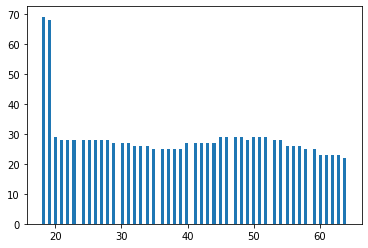

===histogram of bmi===


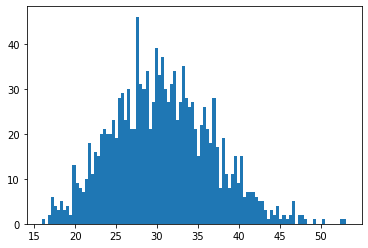

===histogram of children===


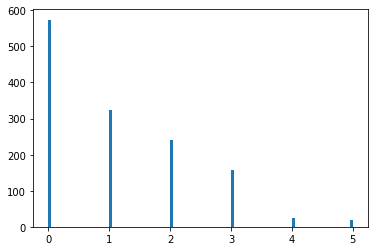

===histogram of charges===


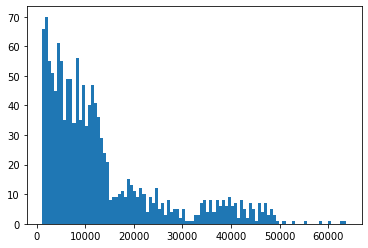

In [5]:
# select each numerical feature
df_num_columns = df.columns[features['numerical']]

# print each column name
for column in df_num_columns:
    # label the column
    print(fr"===histogram of {column}===")
    # plot a histogram for this column
    plt.hist(df[column], N_HIST_BINS)
    # show the plot here
    plt.show()
# next column

### Q4. Use corr() function of Pandas to show the correlation between different numerical features

In [6]:
# find the correlation between numerical features
correlation = df.corr()
# highlight using background gradient
correlation.style.background_gradient()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Q5. For all categorical features, use bar plot to visualize the number of users within each category.

===bar plot of sex===


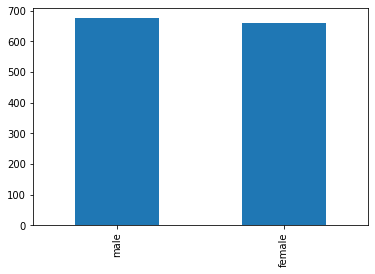

===bar plot of smoker===


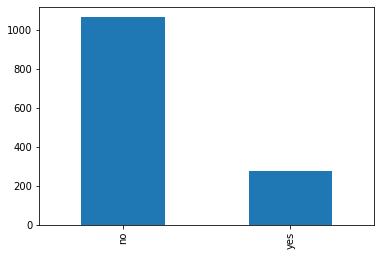

===bar plot of region===


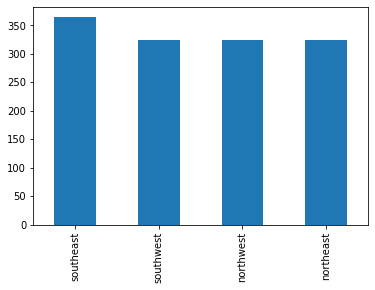

In [7]:
# select each categorical feature
df_cat_columns = df.columns[features['categorical']]

# for each column
for column in df_cat_columns:
    # label the column
    print(fr'===bar plot of {column}===')
    # find the value count
    value_counts = df[column].value_counts()
    # graph the bar plot
    value_counts.plot(kind='bar')
    # show the plot here
    plt.show()
# next column

### Q6. Convert all categorical features into numerical features with Label Encoding or One-Hot Encoding

In [8]:
# encode every column using label encoding,
# look into how to join in columns that are one-hot later

# initialize the encoders
labeler = LabelEncoder()
one_hot = OneHotEncoder(sparse=False)

# for each category column, except for the last columns
for column in df_cat_columns:
    # encode the column
    column_code = labeler.fit_transform(df[column])
    # replace the column
    df[column] = column_code
    # find the resulting value count
    value_counts = df[column].value_counts()
    # print the value count
    print(value_counts, '\n')
# next column

1    676
0    662
Name: sex, dtype: int64 

0    1064
1     274
Name: smoker, dtype: int64 

2    364
3    325
1    325
0    324
Name: region, dtype: int64 



### Q7. Normalize all numerical features

In [9]:
# normalize all numerical features

# get the means of numerical features
means = df[df_num_columns].mean()
# get the standard deviations
std = df[df_num_columns].std()

# calculate the Z-score for each value
Zdf = ((df[df_num_columns] - means)/std)

# replace the numerical values with the Z-scores
df[df_num_columns] = Zdf

### Q8. Save your preprocessed data into a csv file. Submit your code and the preprocessed data.

In [10]:
# first print the preprocessed data
print(df)
# save the preprocessed data
df.to_csv(SAVE_TO)
print(fr"saved to '{SAVE_TO}'.")

           age  sex       bmi  children  smoker  region   charges
0    -1.438227    0 -0.453151 -0.908274       1       3  0.298472
1    -1.509401    1  0.509431 -0.078738       0       2 -0.953333
2    -0.797655    1  0.383164  1.580335       0       2 -0.728402
3    -0.441782    1 -1.305043 -0.908274       0       1  0.719574
4    -0.512957    1 -0.292447 -0.908274       0       1 -0.776512
...        ...  ...       ...       ...     ...     ...       ...
1333  0.768185    1  0.050278  1.580335       0       1 -0.220468
1334 -1.509401    0  0.206062 -0.908274       0       0 -0.913661
1335 -1.509401    0  1.014499 -0.908274       0       2 -0.961237
1336 -1.295877    0 -0.797515 -0.908274       0       3 -0.930014
1337  1.551106    0 -0.261290 -0.908274       1       1  1.310563

[1338 rows x 7 columns]
saved to 'lab02-001-Duran-preproc.csv'.
